In [1]:
import requests
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import random
from collections import Counter

C:\Users\humph\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'http://odapapi.defrilab.com/api/Odap/recentMessages'

In [3]:
response = requests.get(url)
data = response.json()
print(data)

[{'uniqueDeviceId': 'Infinix X559_abc11552-78ef-4ce9-ae51-e06d27b8c3c0', 'lat': -0.39914, 'long': 36.96272166666667, 'alt': 1822.7, 'accuracyGPS': 5.199999809265137, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00', 'time': '14:30:32', 'id': 765}, {'uniqueDeviceId': 'Infinix X559_eea500c0-f1fd-4071-a379-46a9ff42b06b', 'lat': -0.39914, 'long': 36.96272166666667, 'alt': 1822.7, 'accuracyGPS': 5.199999809265137, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00', 'time': '14:30:32', 'id': 764}, {'uniqueDeviceId': 'Infinix X559_8c2c8f93-7404-4367-b3c1-26be31acd761', 'lat': -0.399085, 'long': 36.96265666666667, 'alt': 1825.8, 'accuracyGPS': 5.099999904632568, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00'

In [4]:
loc_compact  = []
for loc in data:
    print(loc) 
    loc_compact.append([loc['lat'],loc['long']])
    print('\n')

{'uniqueDeviceId': 'Infinix X559_abc11552-78ef-4ce9-ae51-e06d27b8c3c0', 'lat': -0.39914, 'long': 36.96272166666667, 'alt': 1822.7, 'accuracyGPS': 5.199999809265137, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00', 'time': '14:30:32', 'id': 765}


{'uniqueDeviceId': 'Infinix X559_eea500c0-f1fd-4071-a379-46a9ff42b06b', 'lat': -0.39914, 'long': 36.96272166666667, 'alt': 1822.7, 'accuracyGPS': 5.199999809265137, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00', 'time': '14:30:32', 'id': 764}


{'uniqueDeviceId': 'Infinix X559_8c2c8f93-7404-4367-b3c1-26be31acd761', 'lat': -0.399085, 'long': 36.96265666666667, 'alt': 1825.8, 'accuracyGPS': 5.099999904632568, 'directionEastWest': 'E', 'directionNorthSouth': 'S', 'accuracy': None, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'date': '2022-02-01T21:00:00

In [5]:
loc_compact

[[-0.39914, 36.96272166666667],
 [-0.39914, 36.96272166666667],
 [-0.399085, 36.96265666666667],
 [-0.399085, 36.96265666666667],
 [-0.3991, 36.96264833333333],
 [-0.3991, 36.96264833333333],
 [-0.399125, 36.96266166666667],
 [-0.399125, 36.96266166666667],
 [-0.39908666666666665, 36.96263833333333],
 [-0.39908666666666665, 36.96263833333333],
 [-0.3990883333333333, 36.962689999999995],
 [-0.3990883333333333, 36.962689999999995],
 [-0.3991465, 36.9627119],
 [-0.3991465, 36.9627119],
 [-0.3991406, 36.9627001],
 [-0.3991406, 36.9627001],
 [-0.3991466, 36.9627157],
 [-0.3991466, 36.9627157],
 [-0.3991471, 36.9627145],
 [-0.3991471, 36.9627145]]

In [6]:
loc_compact = np.array(loc_compact)

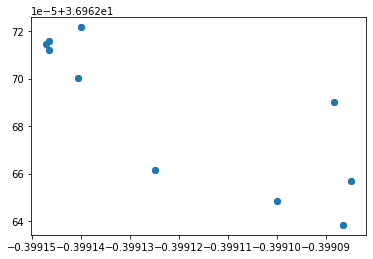

In [7]:
#make our own data using the make_blob 
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(loc_compact[:,0], loc_compact[:,1])

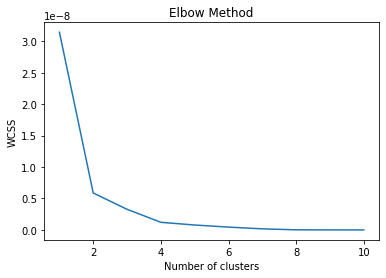

In [8]:
#determine the optimul number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=len(loc_compact), n_init=10, random_state=0)
    kmeans.fit(loc_compact)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

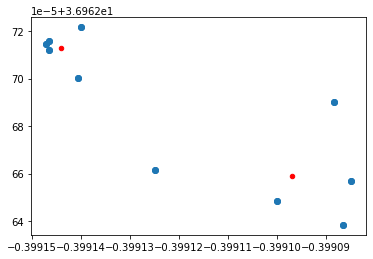

In [9]:
#determine the centroid for each cluster
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=len(loc_compact), n_init=10, random_state=0)
pred_y = kmeans.fit_predict(loc_compact)
plt.scatter(loc_compact[:,0], loc_compact[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=len(loc_compact), c='red')
plt.show()

In [10]:
# get the centroids
centroids = kmeans.cluster_centers_
centroids

array([[-0.39914416, 36.96271277],
       [-0.399097  , 36.962659  ]])

In [11]:
#pick the largest cluster using the length of labels
labels =list(kmeans.labels_)
labels

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
#get unique elements, and use as classes
classes = list(set(labels))
classes

[0, 1]

In [13]:
#find the largest cluster
unique = Counter(labels)
unique

Counter({0: 10, 1: 10})

In [14]:
bigger_cluster = max(unique, key=unique.get)
bigger_cluster

0

In [15]:
centroids[bigger_cluster]

array([-0.39914416, 36.96271277])

## Calculate the bearing
##  source https://towardsdatascience.com/calculating-the-bearing-between-two-geospatial-coordinates-66203f57e4b4

In [16]:
from numpy import arctan2,random,sin,cos,degrees
import math

In [17]:
a = {'lat': -0.399754, 'lon': 36.96256867}
b = {'lat': -0.39942161, 'lon': 36.96269837}

In [18]:
dL = b['lon'] - a['lon']
dL

0.00012969999999512538

In [19]:
X = cos(b['lat'])* sin(dL)
Y = cos(a['lat'])*sin(b['lat']) - sin(a['lat'])*cos(b['lat'])* cos(dL)

In [20]:
#in radians
bearing_rad = arctan2(X,Y)
bearing_rad

0.345106707989331

In [21]:
#radians to degrees 

In [22]:
bearing_degrees = bearing_rad * (180/math.pi)
bearing_degrees

19.773157849442395